In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

# 1. Data Preparation

In [ ]:
from google.colab import files
uploaded=files.upload()



Saving heart_disease.xlsx to heart_disease.xlsx


In [ ]:
data= pd.read_excel("heart_disease.xlsx",sheet_name=1)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# 2. Exploratory Data Analysis (EDA)

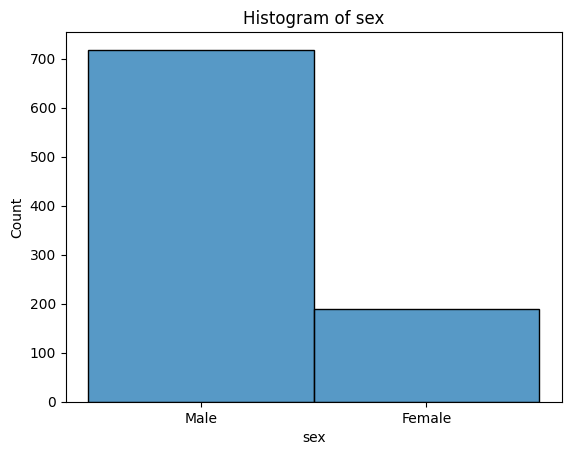

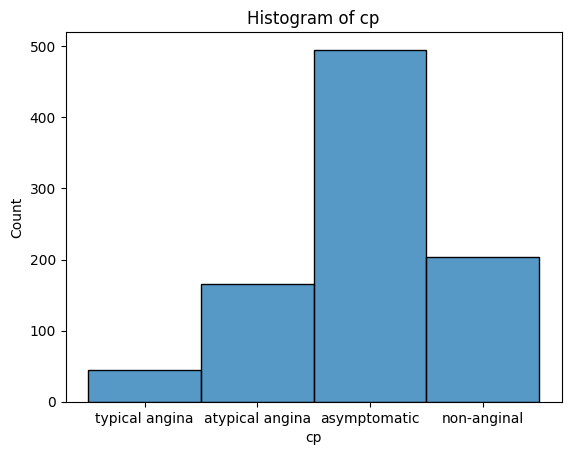

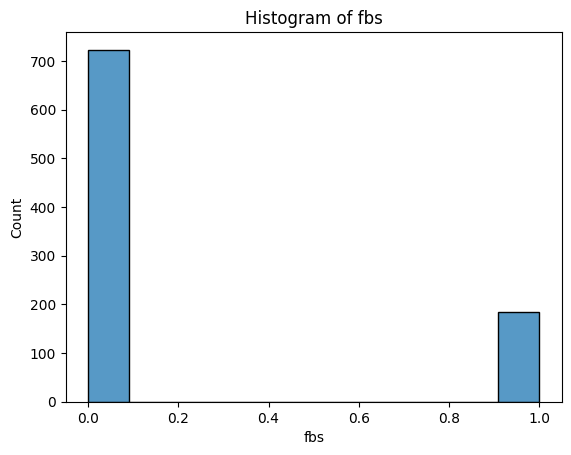

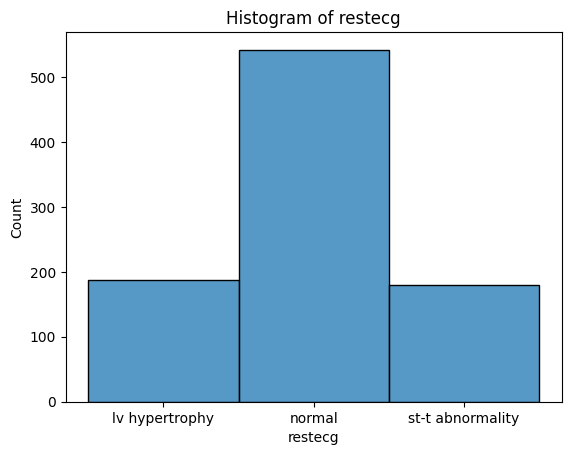

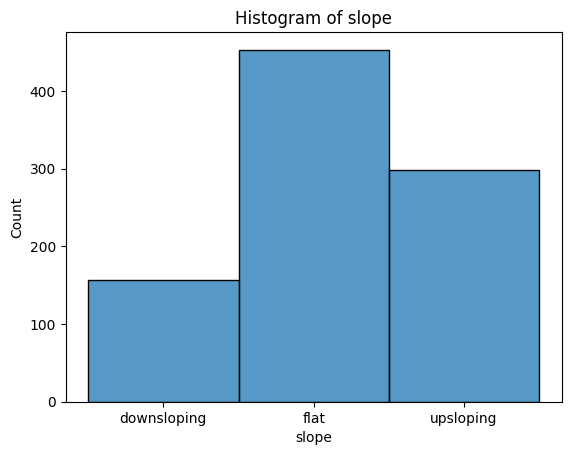

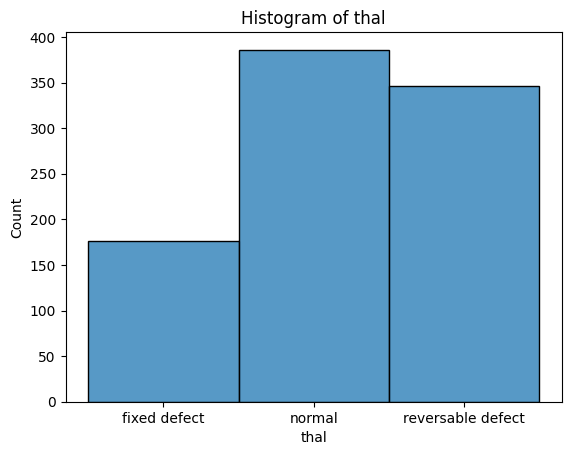

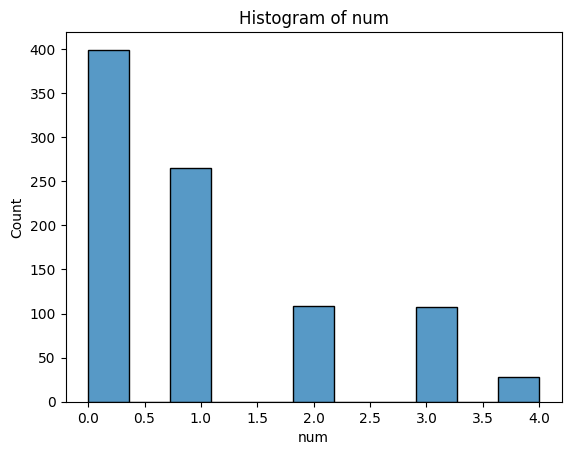

In [ ]:
sns_plot_col= ['sex','cp','fbs','restecg','slope','thal','num']
for i in sns_plot_col:
    sns.histplot(data=data, x=i)
    plt.title(f'Histogram of {i}')
    plt.show()

In [ ]:
data['oldpeak'].value_counts()

,count
oldpeak,
0.0,358
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
1.4,15


In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data.shape

(908, 13)

In [ ]:
data['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [ ]:
data['oldpeak'].median()

0.5

In [ ]:
data['age'].value_counts()

,count
age,
54,51
58,43
55,41
57,38
56,38
52,36
59,35
51,35
62,35


In [ ]:
data[data['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
data['exang'].value_counts()

,count
exang,
False,516
True,337
TURE,36
FALSE,19


# 3. Feature Engineering

In [ ]:
data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)
data[data['oldpeak'].isna()]

<ipython-input-15-a3623043ff2d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['oldpeak'].fillna(data['oldpeak'].median(),inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [ ]:
data['exang'].replace({'TURE': True, 'FALSE': False},inplace=True)
data['exang'].value_counts()

<ipython-input-16-47e72d8c8410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['exang'].replace({'TURE': True, 'FALSE': False},inplace=True)
<ipython-input-16-47e72d8c8410>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'].replace({'TURE': True, 'FALSE': False},inplace=True)


,count
exang,
False,535
True,373


In [ ]:
data['fbs']= data['fbs'].astype(object)
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
data['exang']= data['exang'].astype(object)
data['exang'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 908 entries, 0 to 907
Series name: exang
Non-Null Count  Dtype 
--------------  ----- 
908 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [ ]:
features= data.drop('num',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect


In [ ]:
target= data[['num']]

In [ ]:
features= pd.get_dummies(features,dtype=int)
features

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,41,135,203,132,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,57,140,192,148,0.4,0,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
3,52,118,186,190,0.0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,57,110,201,126,1.5,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
904,62,166,170,120,3.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
905,56,170,0,123,2.5,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
906,56,144,208,105,0.5,0,1,0,0,1,...,0,1,0,1,1,0,0,1,0,0


In [ ]:
features.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'fbs_False', 'fbs_True', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

# 4. Decision Tree Classification

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(     age  trestbps  chol  thalch  oldpeak  sex_Female  sex_Male  \
 84    42       120   295     162      0.0           0         1   
 10    30       170   237     170      0.0           1         0   
 617   74       140   237      94      0.0           0         1   
 250   41       104     0     111      0.0           0         1   
 869   49       137   142      68      0.5           0         1   
 ..   ...       ...   ...     ...      ...         ...       ...   
 106   63       135   252     172      0.0           1         0   
 270   37       120   260     130      0.0           1         0   
 860   48       140   374     159      1.5           0         1   
 435   57       154   232     164      0.0           0         1   
 102   60       150   240     171      0.9           1         0   
 
      cp_asymptomatic  cp_atypical angina  cp_non-anginal  ...  restecg_normal  \
 84                 0                   1               0  ...               1   
 10               

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 24)
(726, 1)
(182, 24)
(182, 1)


In [ ]:
dec_tree= DecisionTreeClassifier()
params= {'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

# 5. Hyperparameter Tuning

In [ ]:
grid_search_params= GridSearchCV(dec_tree, param_grid=params, verbose=2, error_score='raise')
grid_search_params

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
grid_search_params.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
grid_search_params.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [ ]:
dec_tree_params= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4)
dec_tree_params

DecisionTreeClassifier(max_depth=4, splitter='random')

In [ ]:
dec_tree_params.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [ ]:
y_pred= dec_tree_params.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.5659340659340659

In [ ]:
dec_tree_manual= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree_manual

DecisionTreeClassifier(max_depth=3)

In [ ]:
dec_tree_manual.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_manual= dec_tree_manual.predict(x_test)
y_pred_manual

array([1, 1, 0, 3, 1, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 3, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 1, 0, 3, 1, 0, 1, 0, 0, 0,
       1, 0, 3, 0, 0, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 1,
       1, 0, 1, 3, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       0, 1, 3, 1, 1, 0])

In [ ]:
accuracy_score(y_test,y_pred_manual)

0.5714285714285714

In [ ]:
print(classification_report(y_test,y_pred_manual))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6. Model Evaluation and Analysis

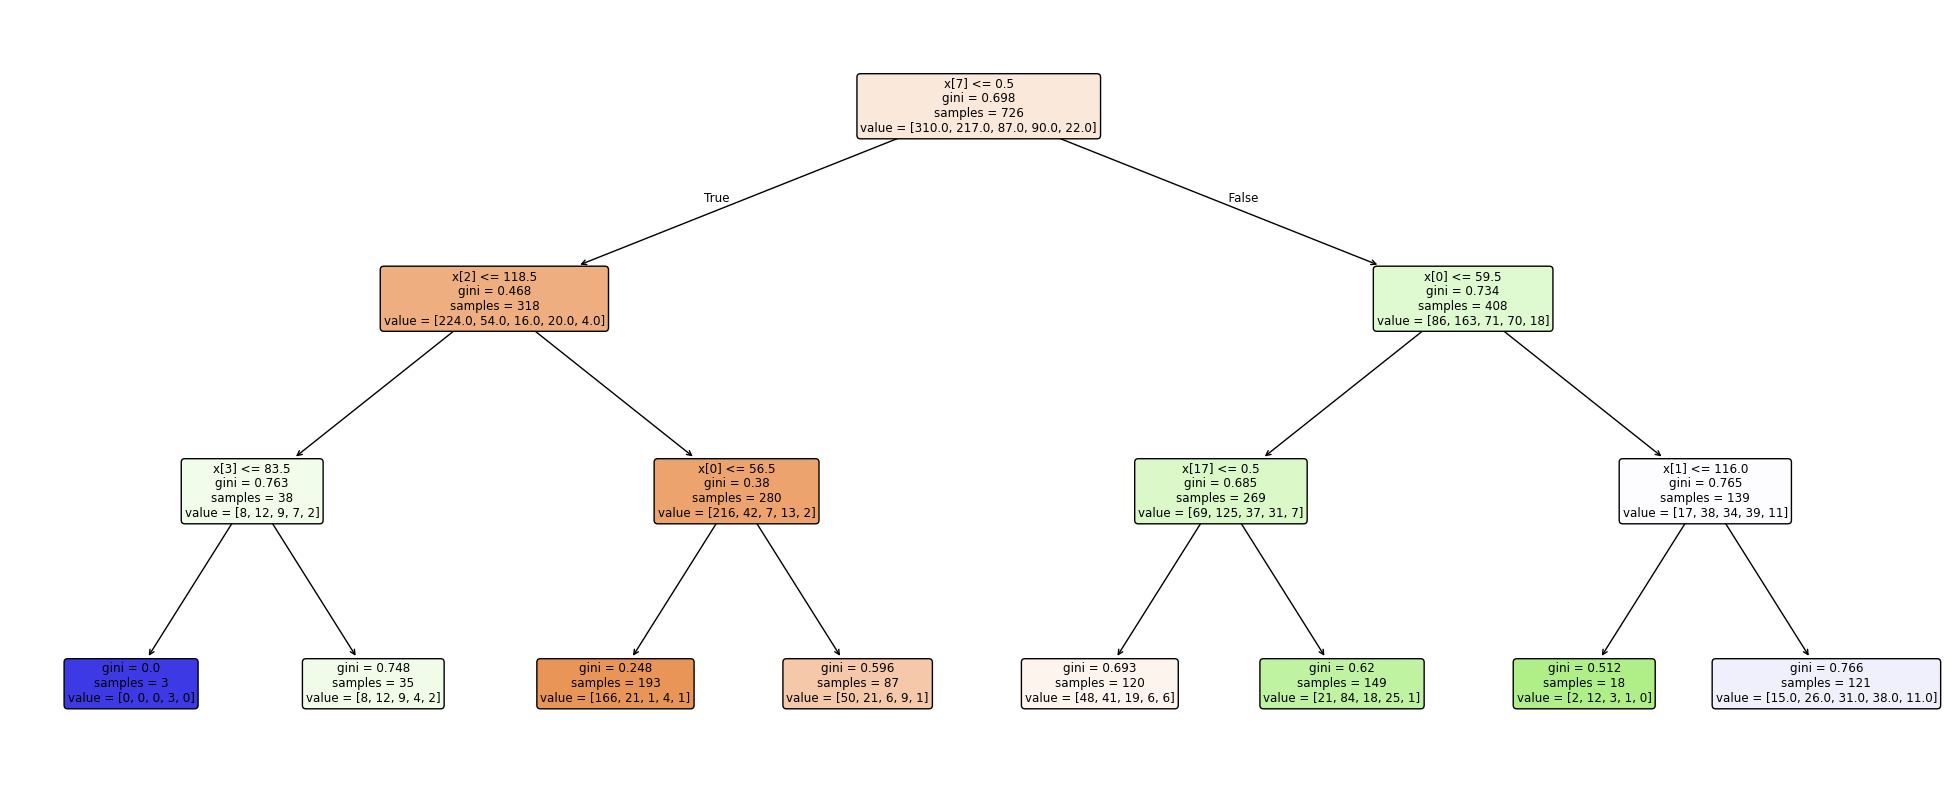

In [ ]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual, filled=True, rounded=True);

In [ ]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5769230769230769

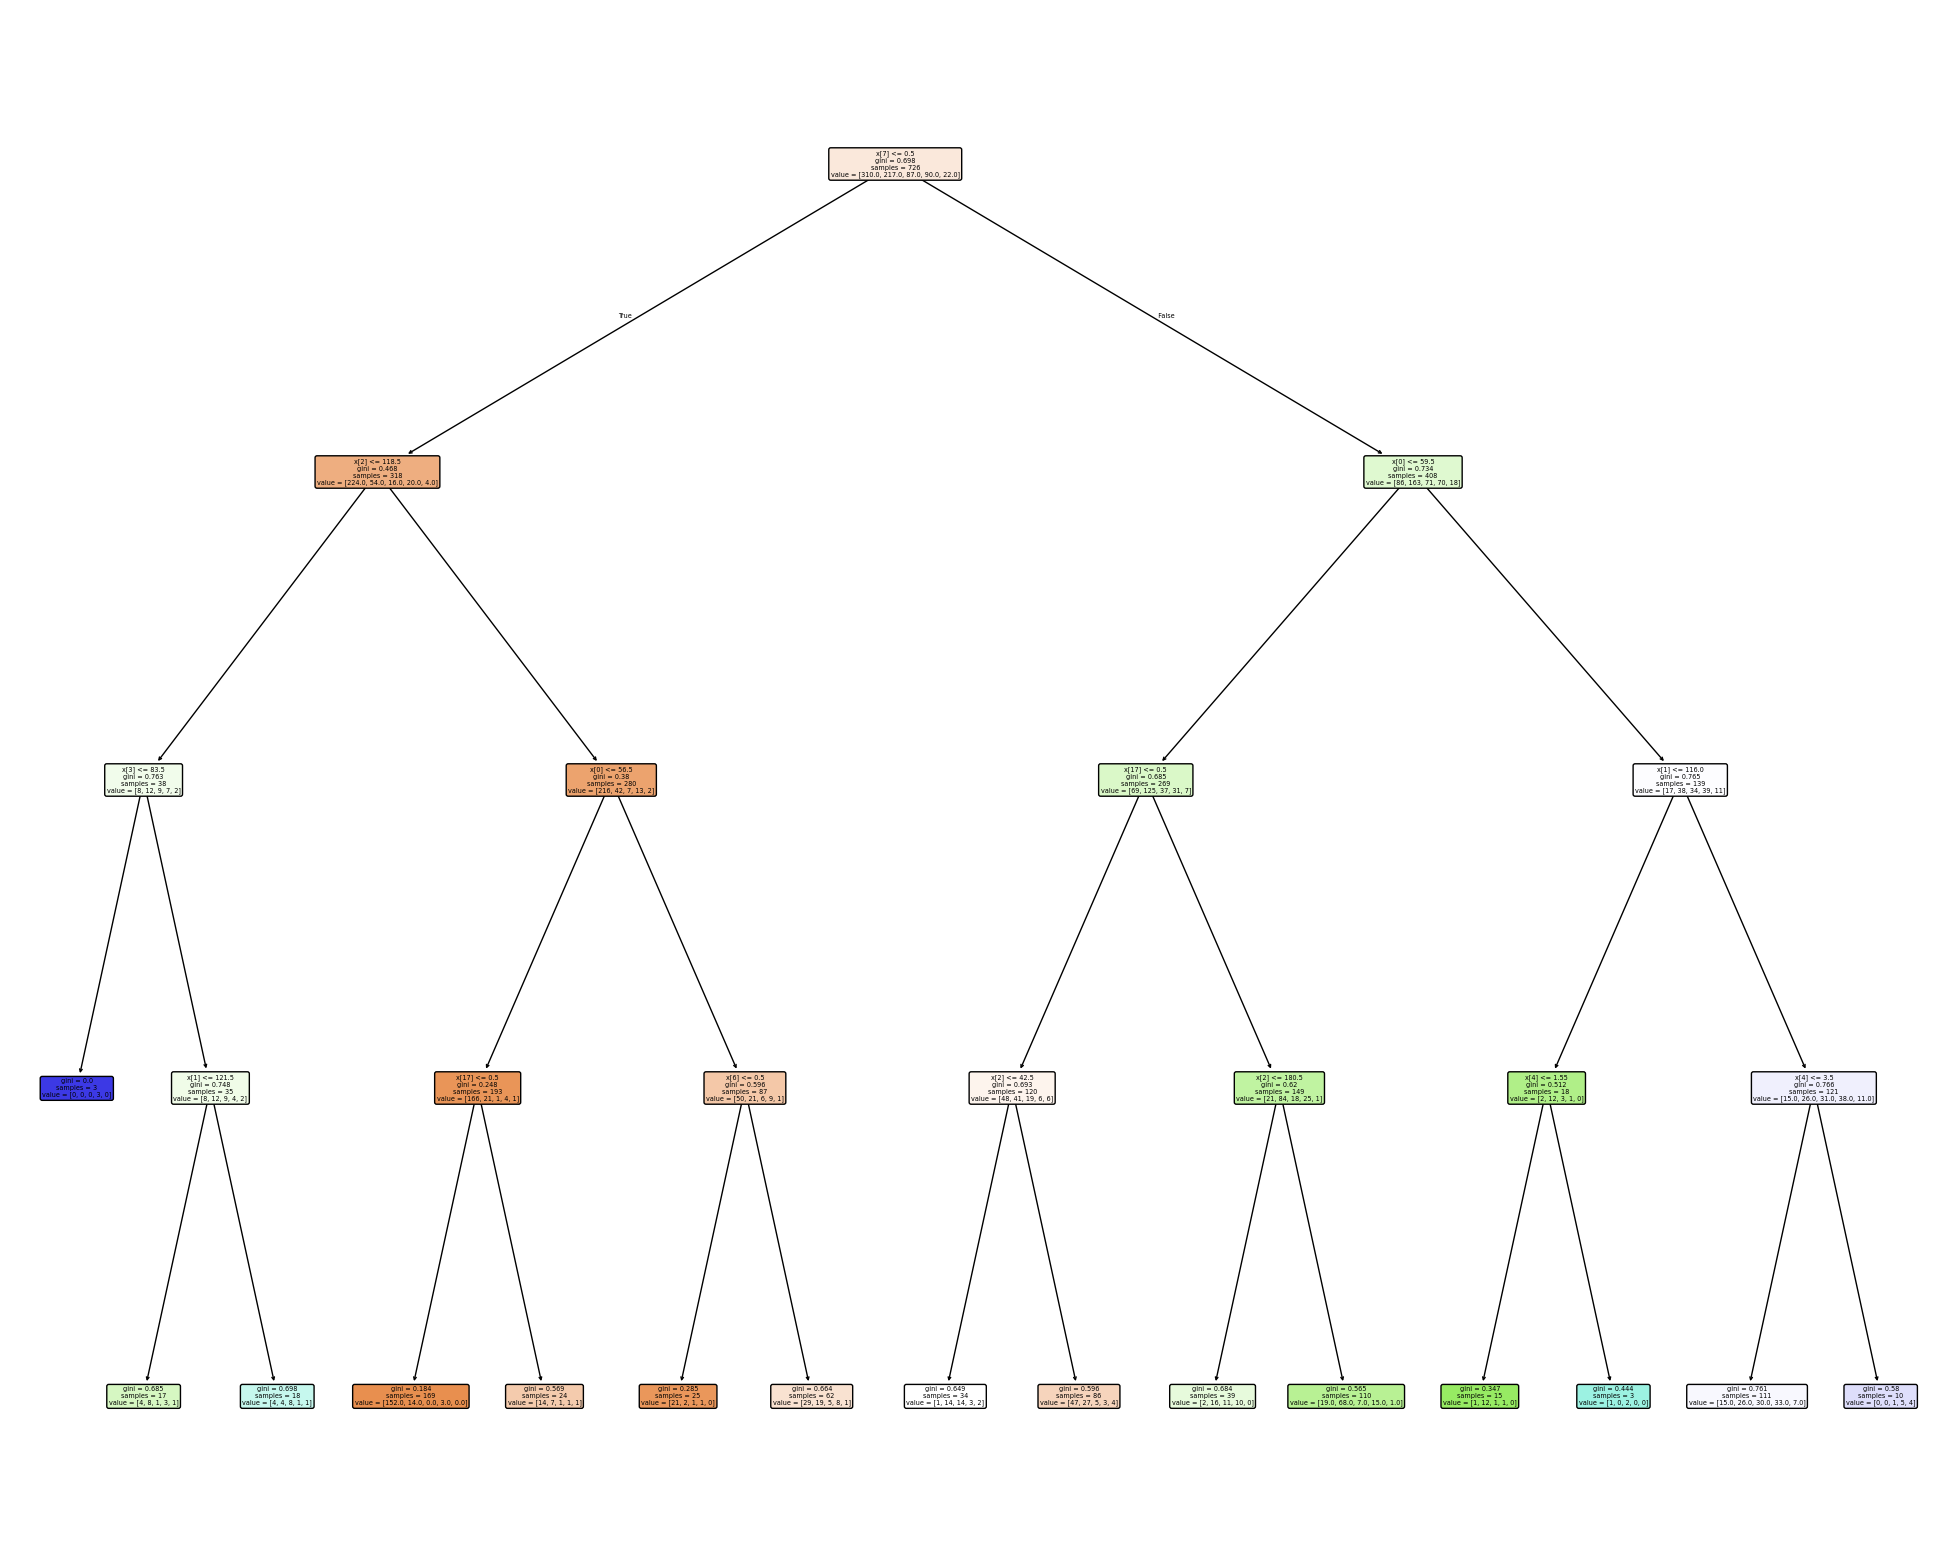

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [ ]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5879120879120879

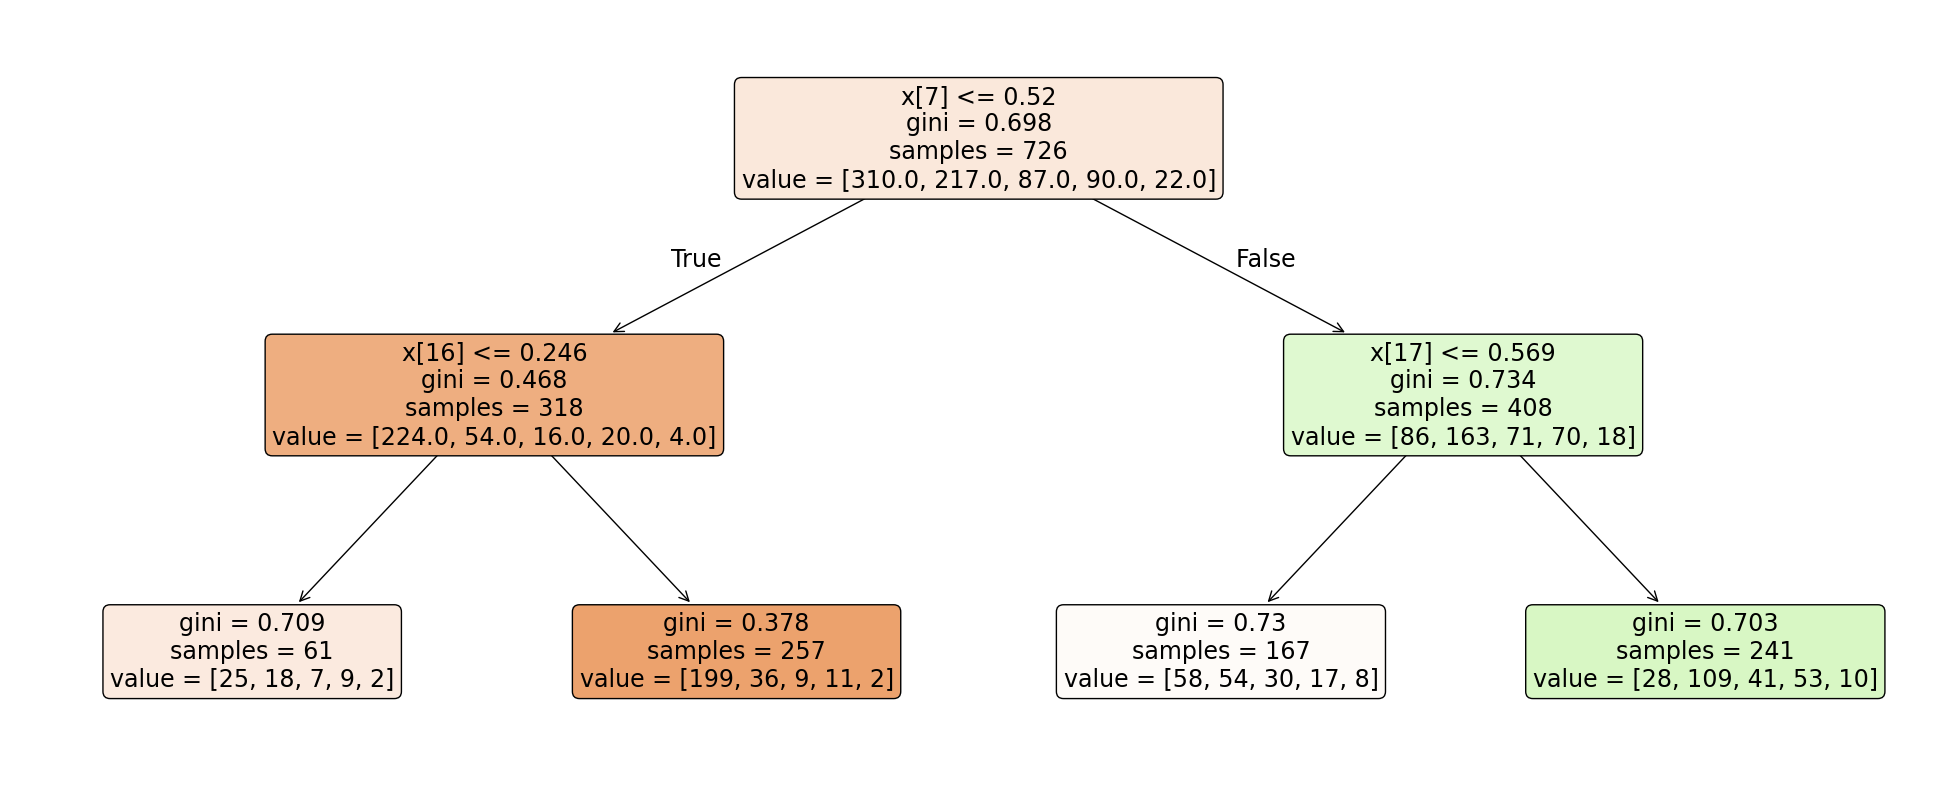

In [ ]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);

In [ ]:
dec_tree_manual_1= DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=2)
dec_tree_manual_1.fit(x_train,y_train)
y_pred_manual_1= dec_tree_manual_1.predict(x_test)
accuracy_score(y_test,y_pred_manual_1)

0.5879120879120879

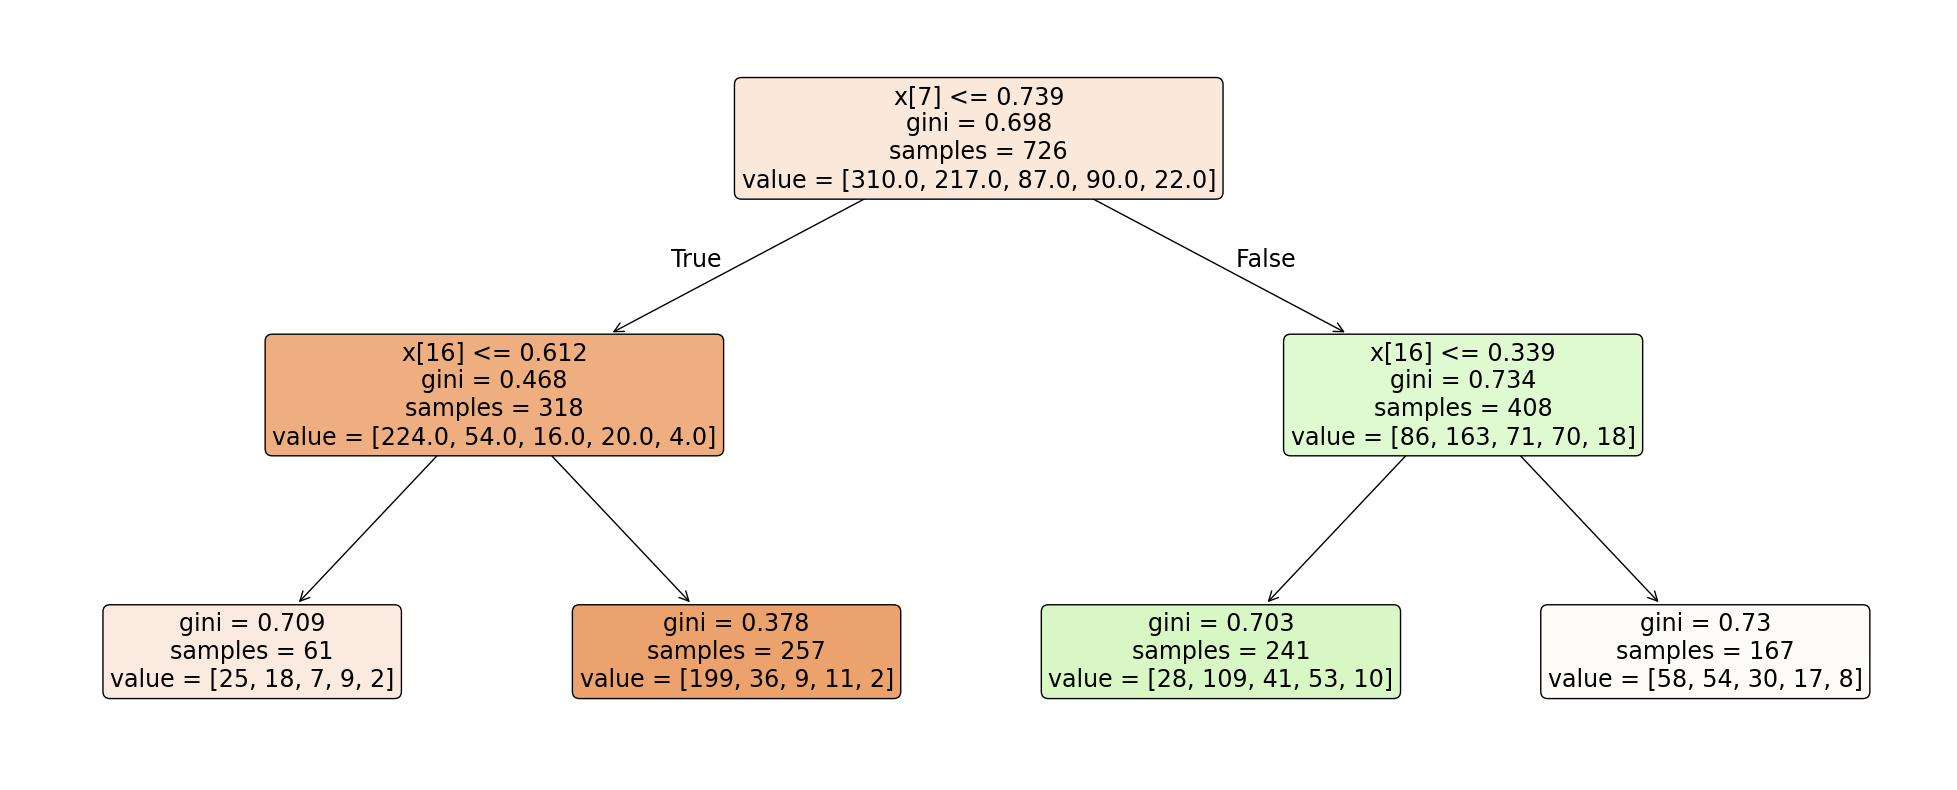

In [ ]:
plt.figure(figsize=(25,10))
plot_tree(dec_tree_manual_1,filled=True, rounded=True);